In [6]:
# Importando las librerias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# Importando el dataset

dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values


In [11]:
# Entrenando el modelo del arbol de decision para poder usar la regresión con el mismo, para este vamos a usar todo el dataset 
# ya que este modelo es de aprendizaje no supervisado.

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 0)
model.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [12]:
# Aqui el algoritmo al ser uno no supervisado podemos usarlo sin necesidad de provarlo y podemos ver como es que se ajusto al modelo

# Hacemos una prediccion de un resultado

model.predict([[6.5]])

array([150000.])

C:\Users\rodri\AppData\Local\Temp\ipykernel_32232\2916239632.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


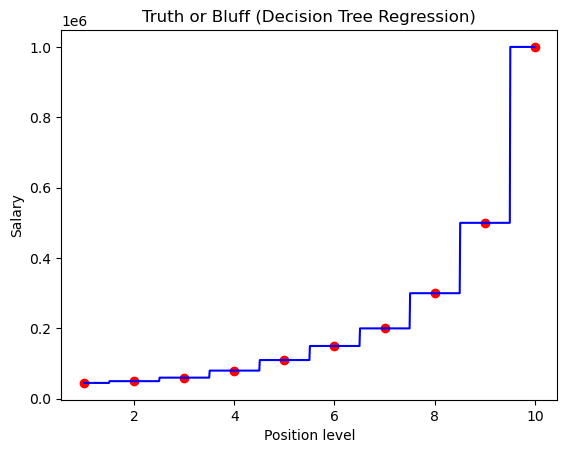

In [14]:
# Hacemos una Visualizacion sobre el modelo resultante y los datos

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [18]:
# Si X es un numpy.ndarray, conviértelo en un DataFrame
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

In [20]:
# Si quieren visualizar como es que el arbol fue haciendo las particiones de los subconjuntos para poder asi maximizar la entropia de la información les comparto el codigo para poder hacerlo
from sklearn.tree import export_graphviz
import graphviz

# Exportar el árbol en formato DOT
dot_data = export_graphviz(model, out_file=None,
                            feature_names=X.columns,
                            filled=True, rounded=True,
                            special_characters=True)

# Visualizar el árbol
graph = graphviz.Source(dot_data)
graph.render("tree")  # Guarda el árbol en un archivo llamado tree.pdf
graph  # Muestra el gráfico en Jupyter Notebook

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
# Importancia de las características
importancias = model.feature_importances_
for nombre, importancia in zip(X.columns, importancias):
    print(f"Característica: {nombre}, Importancia: {importancia}")

# Información del árbol
print(f"Número de nodos: {model.tree_.node_count}")
print(f"Profundidad del árbol: {model.tree_.max_depth}")